In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('Housing.csv')
print(data.head())

In [6]:
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
for col in data.select_dtypes(include='object').columns:
    data[col], _ = data[col].factorize()

In [7]:
X = data.drop('price', axis=1)
y = data['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
def initialize_parameters(n_features):
    weights = np.zeros((n_features,))
    bias = 0
    return weights, bias

In [10]:
def predict(X, weights, bias):
    return np.dot(np.array(X), weights) + bias

In [11]:
def compute_loss(y_pred, y_true):
    n = len(y_true)
    loss = np.sum((y_pred - y_true) ** 2) / n
    return loss

In [12]:
def compute_gradients(X, y_true, y_pred):
    n = len(y_true)
    dw = -(2/n) * np.dot(X.T, (y_true - y_pred))
    db = -(2/n) * np.sum(y_true - y_pred)
    return dw, db

In [13]:
def update_parameters(weights, bias, learning_rate, gradients):
    dw, db = gradients
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

In [14]:
def train(X_train, y_train, learning_rate, epochs):

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    n_features = X_train.shape[1]
    weights, bias = initialize_parameters(n_features)

    for i in range(epochs):
        y_pred = predict(X_train, weights, bias)
        loss = compute_loss(y_pred, y_train)
        gradients = compute_gradients(X_train, y_train, y_pred)
        weights, bias = update_parameters(weights, bias, learning_rate, gradients)

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss}")
            print(f"Weights: {weights}, Bias: {bias}")

    return weights, bias

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(X_test, y_test, weights, bias):
    # Convert to NumPy arrays
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Predictions
    y_pred = predict(X_test, weights, bias)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, r2

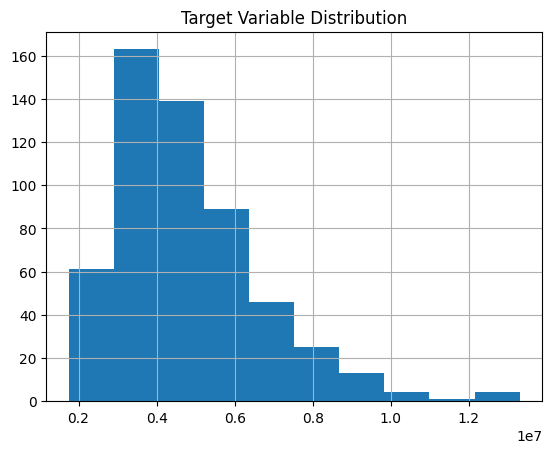

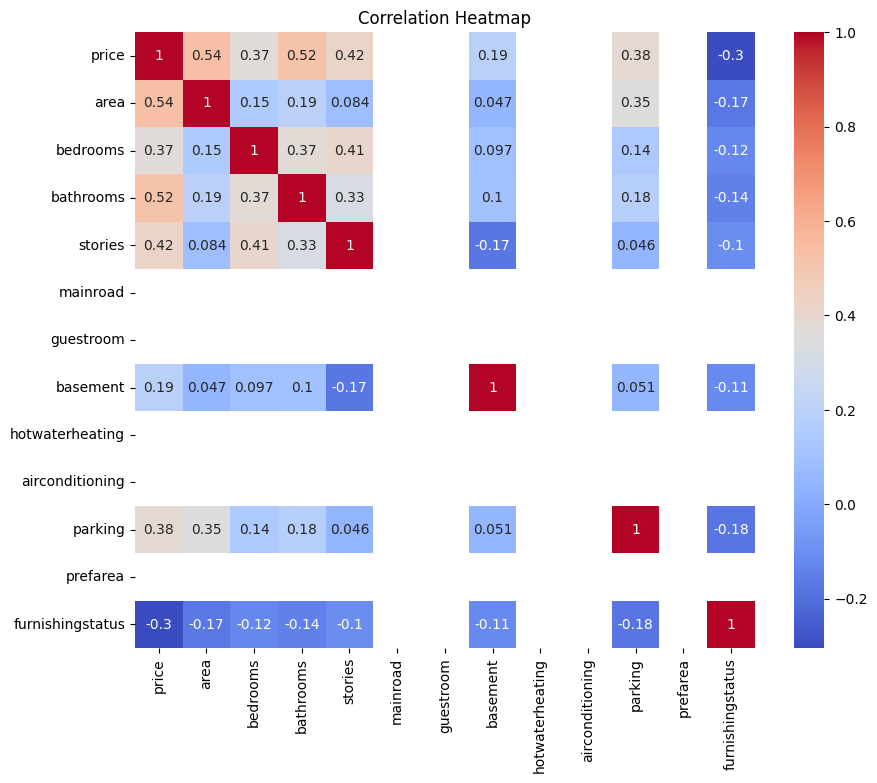

In [15]:
y.hist()
plt.title('Target Variable Distribution')
plt.show()

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()